In [2]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt 
from mxnet import autograd, nd
import random

In [6]:
# 生成人工数据集
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:,0] + true_w[1] * features[:,1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [13]:
features[0], labels[0]

(
 [-2.1362736  -0.93159074]
 <NDArray 2 @cpu(0)>,
 
 [3.104913]
 <NDArray 1 @cpu(0)>)

In [19]:
labels.asnumpy().shape, features[:,1].asnumpy().shape

((1000,), (1000,))

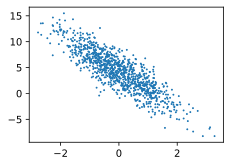

In [20]:
def use_svg_display():
    # 用矢量图表示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5,2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams ['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:,1].asnumpy(),labels.asnumpy(),1);

In [24]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i+batch_size, num_examples)])
        yield features.take(j), labels.take(j)

In [25]:
batch_size = 10
for X,y in data_iter(batch_size, features, labels):
    print(X, y)
    break


[[ 1.3644261  -1.5351454 ]
 [-1.3315712   2.878743  ]
 [-1.061613   -0.31767654]
 [-0.83923775 -2.0599022 ]
 [-0.07745019 -0.17861326]
 [ 0.48741814  1.1460419 ]
 [-1.1809592   0.11222906]
 [ 0.01856459  1.1970546 ]
 [-1.1766593  -0.7156726 ]
 [-1.01162     0.8900306 ]]
<NDArray 10x2 @cpu(0)> 
[12.141248   -8.246759    3.1463063   9.527003    4.643607    1.2723691
  1.4706196   0.16128802  4.2924623  -0.8470407 ]
<NDArray 10 @cpu(0)>


In [27]:
# 初始化模型参数
w = nd.random.normal(scale=0.01, shape=(num_inputs,1))
b = nd.zeros(shape=(1,))
w.attach_grad()
b.attach_grad()

In [29]:
# 线性回归矢量表达式
def linreg(X, w, b):
    return nd.dot(X,w)+b

In [31]:
# 损失函数
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [33]:
# 优化算法 min-batch梯度下降法
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [34]:
# 主函数 也就是真正的回归
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    # 一共需要num_epochs 个周期
    # 在每一次迭代周期中， 会使用训练数据集中所有样本一次（假设样本能够被批量大小整除）
    # X和y分别是小样本的特征和标签
    for X,y in data_iter(batch_size,features,labels):
        with autograd.record():
            l = loss(net(X,w,b), y)
        l.backward()
        sgd([w,b],lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f'%(epoch+1, train_l.mean().asnumpy()))

epoch 1, loss 0.037921
epoch 2, loss 0.000133
epoch 3, loss 0.000045


In [37]:
true_w , w

([2, -3.4],
 
 [[ 1.9991875]
  [-3.399785 ]]
 <NDArray 2x1 @cpu(0)>)

In [38]:
true_b, b

(4.2,
 
 [4.199662]
 <NDArray 1 @cpu(0)>)